# K Means Clustering 

Clustering algorithms seek to learn, from the properties of the data, an optimal division or discrete labeling of groups of points.

Many clustering algoritms are available in *Scikit-Learn*, but only K-Means clustering is easy to understand and work with so we are going to use scikits learns `sklearn.clustering.KMeans`.

Lets begin with standard imports

In [1]:
# base import 
import numpy as np # matrix maths 
import matplotlib.pyplot as plt # plotting 
import seaborn as sns; sns.set() # beautiful plots 

%matplotlib inline

# Introducing Kmeans 

The k-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset. It accomplishes this using a simple conception of what the optimal clustering.

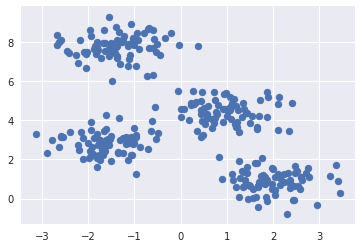

In [2]:
# make data set for clustering 
from sklearn.datasets.samples_generator import make_blobs

X,y_true = make_blobs(300,random_state=0, cluster_std=0.60, centers=4) # generating data set 

plt.scatter(X[:,0],X[:,1],s=50);

We can see that there are four cluster but Kmeans can automatically detect the clusters:

In [3]:
# making a model 
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4)
model.fit(X)
y_means = model.predict(X)

Lets viz our result

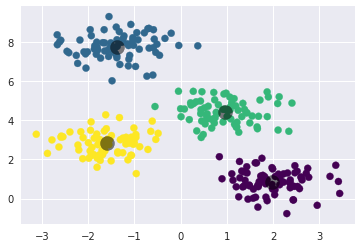

In [4]:
# making a cluster plot 
plt.scatter(X[:,0],X[:,1],c=y_means, cmap='viridis', s=50) # data plot 
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

# Kmeans Algorithm: Expectation-Maximization

Expectation–maximization (E–M) is a powerful algorithm that comes up in a variety of contexts within data science. k-means is a particularly simple and easy-to-understand application of the algorithm, and we will walk through it briefly here.

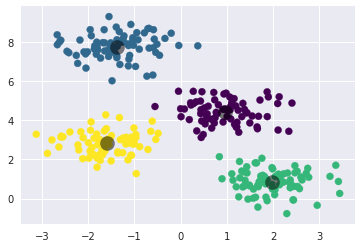

In [5]:
# import pair wise algo 
from sklearn.metrics import pairwise_distances_argmin # function to find pair wise distances 

# making a function for clustering 
def find_cluster(X,n_cluster,rseed=2):
    # 1. Randomly choose cluster 
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_cluster]
    centers = X[i]
    
    while True:
        #2a. assign label based on closest point 
        labels = pairwise_distances_argmin(X,centers)
        #2b. find new centers 
        new_centers =  np.array([X[labels == i].mean(0)
                               for i in range(n_cluster)])
        #3. check for convergrence
        if np.all(centers == new_centers):
            break; 
        centers = new_centers
        
    return centers,labels

centers, labels =  find_cluster(X,4)
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=50)
plt.scatter(centers[:,0],centers[:,1],c='black', s=200, alpha=0.5);

First, although the E–M procedure is guaranteed to improve the result in each step, there is no assurance that it will lead to the global best solution. For example, if we use a different random seed in our simple procedure, the particular starting guesses lead to poor results:

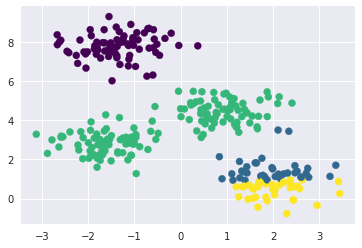

In [6]:
centers, labels = find_cluster(X, 4, rseed=0)
plt.scatter(X[:,0],X[:,1],c=labels, cmap='viridis',s=50);

Here the E–M approach has converged, but has not converged to a globally optimal configuration. For this reason, it is common for the algorithm to be run for multiple starting guesses, as indeed Scikit-Learn does by default (set by the `n_init` parameter, which defaults to 10).

## Kmeans is limited to linear boundaries 

The fundamental model assumptions of k-means (points will be closer to their own cluster center than to others) means that the algorithm will often be ineffective if the clusters have complicated geometries.

In particular, the boundaries between k-means clusters will always be linear, which means that it will fail for more complicated boundaries. Consider the following data, along with the cluster labels found by the typical k-means approach:

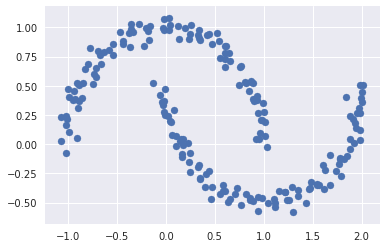

In [7]:
# making data set 
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=0.05, random_state=0)
plt.scatter(X[:,0], X[:,1]);

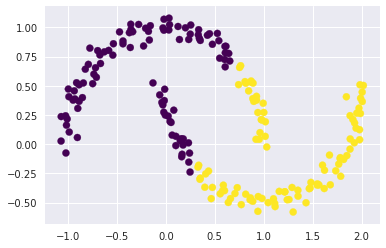

In [8]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

This situtation is just like SVM problem so here we can solve it with the help of kernelized K-Means 

One version of this kernelized k-means is implemented in Scikit-Learn within the `SpectralClustering` estimator. It uses the graph of nearest neighbors to compute a higher-dimensional representation of the data, and then assigns labels using a k-means algorithm

/home/sanidhya/anaconda3/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


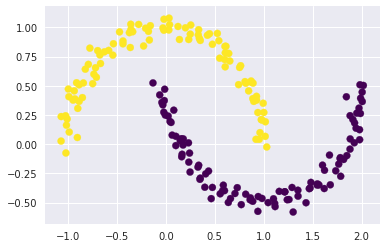

In [9]:
# import kernelized kmeans 
from sklearn.cluster import SpectralClustering

model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:,0],X[:,1], c=labels, cmap='viridis', s=50); # plotting labels

We see that with this kernel transform approach, the kernelized k-means is able to find the more complicated nonlinear boundaries between clusters.